<a href="https://colab.research.google.com/github/Rishabh8827/Machine-Learning---Summer-Training/blob/main/Day%205/Day5_Comparison_Of_Clustering_Alog's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***To See Final Result - Go To The Last Cells (Final Evaluation Of All Clustering Algorithms)***

**`Press - CTRL + ]`**

From your Keyboard To Collaps all cells

# Importing Required Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore")

Imprting Dataset From Drive

DatSet Source - [Credit Card Dataset for Clustering - Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) 

In [134]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CC GENERAL.csv")

print('The shape of the dataset is:', df.shape)
df.head(10)

The shape of the dataset is: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Exploring Dataset

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [136]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Visulizing Correlation

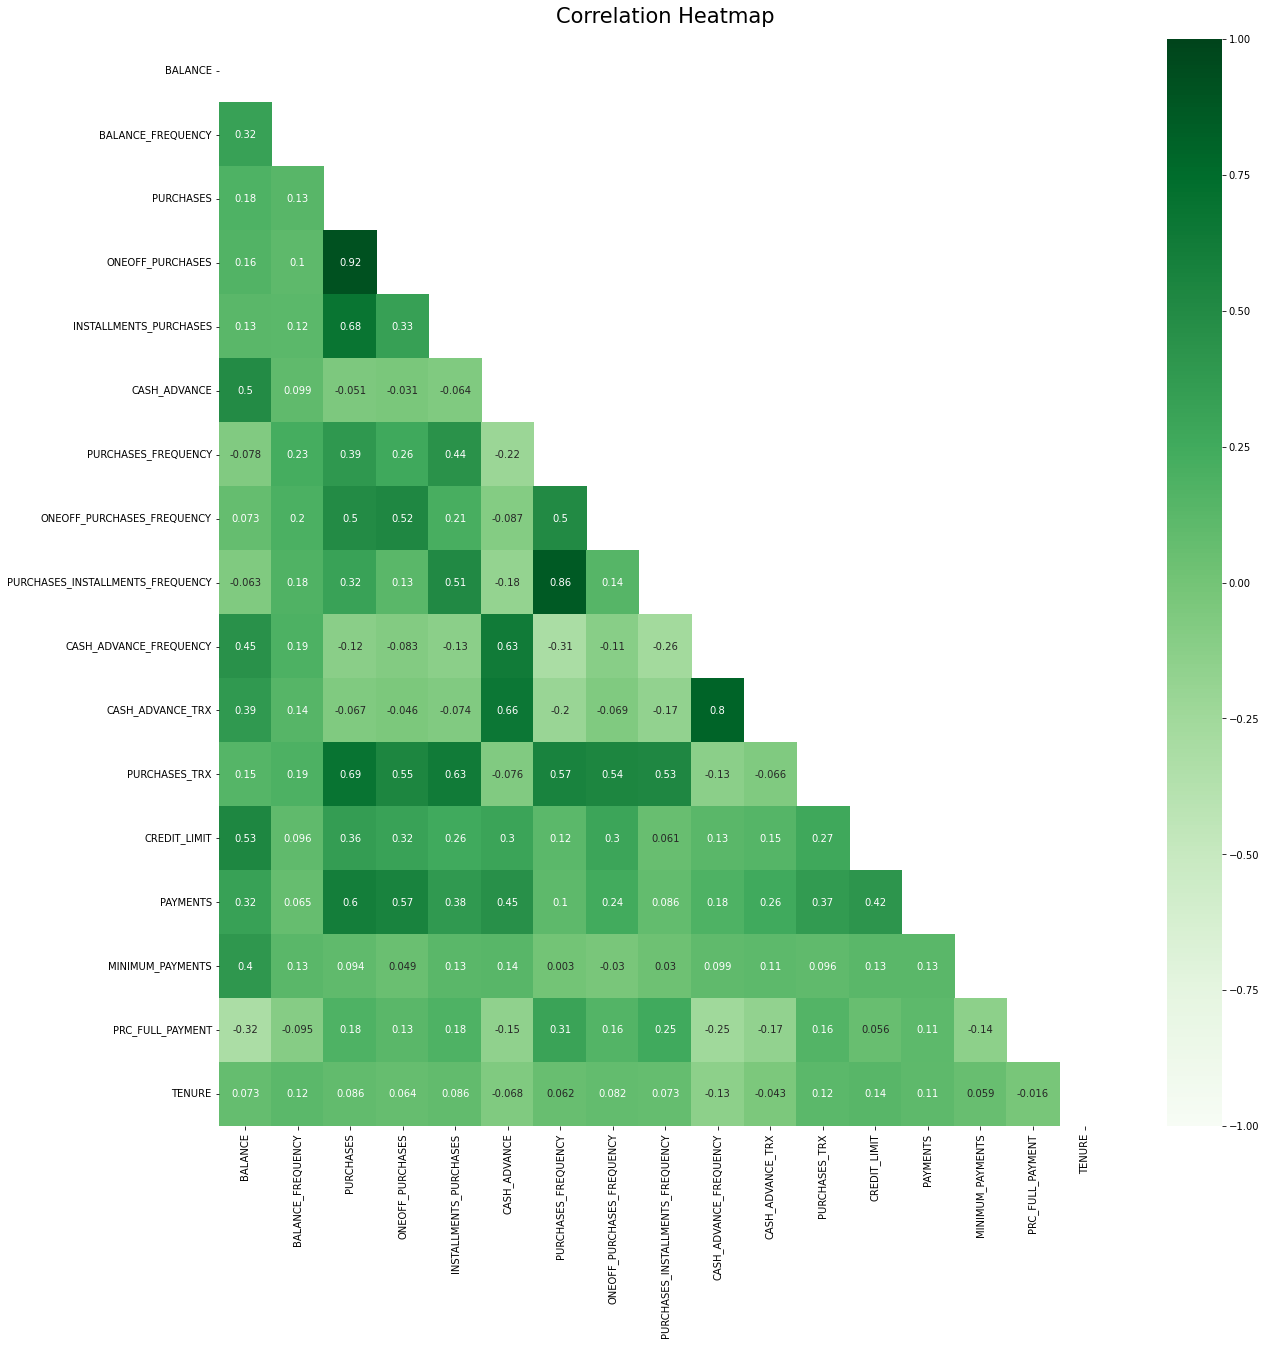

In [137]:
plt.subplots(figsize=(20,20))

mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':21}, pad=16);

# Removing Catogorical Column

In [138]:
df_copy=df.copy()

In [139]:
df_copy.set_index('CUST_ID', inplace=True)

# Missing Value Handling

In [140]:
#null Check
df_copy["CREDIT_LIMIT"].fillna(df_copy["CREDIT_LIMIT"].mean(), inplace=True)
df_copy["MINIMUM_PAYMENTS"].fillna( df_copy["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [141]:
#test 
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [142]:
df_scaled = df_copy.copy()
col_names =df_scaled.columns
features = df_scaled[col_names]

# Scaling (Standard Scaler)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Standard_Scaler = df_copy.copy()

df_Standard_Scaler[col_names] = scaler.fit_transform(features.values)
df_Standard_Scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


# Scaling (Robust Scaler)

In [144]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_RobustScaler = df_copy.copy()
df_RobustScaler[col_names] = scaler.fit_transform(features.values)
df_RobustScaler.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000
mean,3.588476e-01,-1.104565,5.996523e-01,0.960223,0.687243,0.878840,-0.011579,0.397082,0.263694,0.608150,0.812207,0.481865,0.304990,5.772887e-01,0.762355,1.076004,-0.482682
std,1.080833e+00,2.132138,1.995932e+00,2.874738,1.929718,1.882855,0.481645,0.994454,0.529930,0.900547,1.706162,1.553603,0.742574,1.907335e+00,3.361350,2.047496,1.338331
min,-4.535045e-01,-9.000009,-3.374887e-01,-0.065812,-0.189912,0.000000,-0.600000,-0.277777,-0.222223,0.000000,0.000000,-0.437500,-0.602041,-5.645465e-01,-0.484041,0.000000,-6.000000
25%,-3.868942e-01,-1.000000,-3.004638e-01,-0.065812,-0.189912,0.000000,-0.500000,-0.277777,-0.222223,0.000000,0.000000,-0.375000,-0.285714,-3.120353e-01,-0.237645,0.000000,0.000000
50%,2.951740e-17,0.000000,2.653585e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.744563e-17,0.000000,0.000000,0.000000
75%,6.131058e-01,0.000000,6.995362e-01,0.934188,0.810088,1.000000,0.500000,0.722223,0.777777,1.000000,1.000000,0.625000,0.714286,6.879647e-01,0.762355,1.000000,0.000000
max,9.434627e+00,0.000000,4.547269e+01,70.528052,47.821611,42.320270,0.600000,3.055557,1.111111,6.750007,30.750000,21.937500,5.510204,3.285194e+01,109.714720,7.000007,0.000000


# Scaling(Min Max Scaler)

In [145]:
from sklearn.preprocessing import MinMaxScaler
df_MinMaxScaler = df_copy.copy()

scaler = MinMaxScaler()
df_MinMaxScaler[col_names] = scaler.fit_transform(features.values)
df_MinMaxScaler.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148396,0.034170,0.011310,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121490,0.057078,0.030503,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004392,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.011310,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Principal Componant Analysis(PCA)**

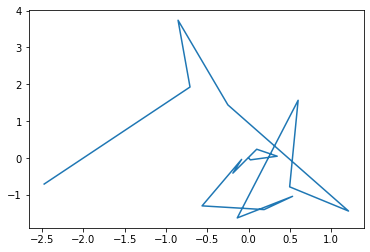

In [146]:
pca = PCA()
#Transform the data
df_pca = pca.fit_transform(df_RobustScaler)
plt.plot(df_pca[0], df_pca[1])  # Plot the chart
plt.show()

# **Kernel - Principal Componant Analysis(Kernel PCA)**

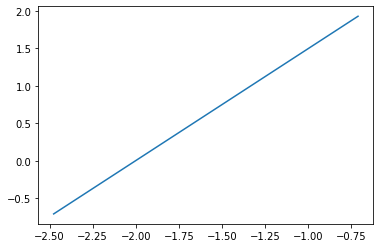

In [147]:
kernel_pca = KernelPCA(n_components=2,kernel='linear')
kernel_pca_df = kernel_pca.fit_transform(df_RobustScaler)
plt.plot(kernel_pca_df[0], kernel_pca_df[1])  # Plot the chart
plt.show() 

# **Using Elbow Method To Find No. Of Clusters**

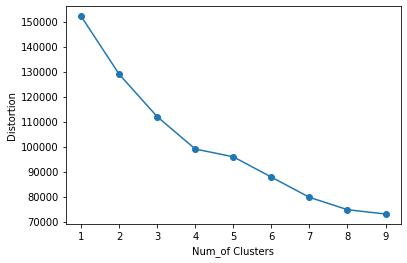

In [148]:
inertia_list=[]

for i in range(1, 10):
    kmean_skl = KMeans(n_clusters=i, n_init=1,max_iter=200)
    kmean_skl.fit(df_Standard_Scaler)
    inertia_list.append(kmean_skl.inertia_)
    
plt.plot(range(1, 10), inertia_list, marker='o')
plt.xlabel('Num_of Clusters')
plt.ylabel('Distortion')
plt.show()

# 0 : K - Means(++) Clustering (Function)

In [149]:
def kmean(df):
    kmean = KMeans(n_clusters=4, max_iter=100)
    kmean.fit(df)
    kmean.fit_predict(df)
    labels_kmean= kmean.labels_
    #df_pred=pd.DataFrame(pred,index=df_copy.index,columns= ['Model_label'])
    return labels_kmean

# 1 : Hierarchical Clustering (Function)

In [150]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_Hierarchical(df):
    cluster_Hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
    cluster_Hierarchical.fit_predict(df)     
    labels_cluster_Hierarchical=cluster_Hierarchical.labels_
    return labels_cluster_Hierarchical

# 2 : DBSCAN Clustering (Function)

In [151]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=8, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_


n=dbscan(df_RobustScaler)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('Silhoutte score of dbscan is ' , silhouette_score(df_RobustScaler,n))

Silhoutte score of dbscan is  0.7352228681147794


# 3 : Isolation Forest Clustering (Function)

In [152]:
from sklearn.ensemble import IsolationForest 
def IForest(df):
    lforest = IsolationForest().fit(df)
    lforest_labels = lforest.predict(df)
    return lforest_labels

# 4 : Gaussian Mixture Clustering (Function)

In [153]:
from sklearn import mixture
def gmm(df):
    gmm = mixture.GaussianMixture(n_components=3,covariance_type="full",max_iter = 100,init_params="random")
    gmm.fit(df)
    gmm_labels = gmm.predict(df)
    return(gmm_labels)

#***Evaluation Function(novelty Added - Changed According To Requirement)***

In [154]:
#Let us first define a function to evaluate our PCA models
def Evaluate(CA,sclr,isRobust,isminmax = False):
  #1-MinMaxScaler with diff algo
  title = ""
  if isminmax:
    title = "Min Max Scaler"
  elif isRobust:
    title =  "Robust Scaler"
  else:
    title = "Standard Scaler"
  if CA == pca:
      print('\n{}Evaluation Using PCA{}\n'.format('*'*20, '*'*20))
  else:
      print('\n{}Evaluation Using PCA Kernel{}\n'.format('*'*20, '*'*20))
  Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,2]), columns=['Silhoutte Score','Davies Bouldin Score'])
  df_pca = CA.fit_transform(sclr)
  labels_kmean=kmean(df_pca)
  labels_cluster_Hierarchical=cluster_Hierarchical(df_pca)
  gmm_labels=gmm(df_pca)
  if isminmax: 
    isminmax = True
  else: 
    cluster_dbscan_labels=dbscan(df_pca)
  lforest_labels=IForest(df_pca)
  Model_Evaluation_Comparison_Matrix.loc[0,'Silhoutte Score']  = silhouette_score(df_pca, labels_kmean)
  Model_Evaluation_Comparison_Matrix.loc[1,'Silhoutte Score']  = silhouette_score(df_pca, labels_cluster_Hierarchical)
  Model_Evaluation_Comparison_Matrix.loc[2,'Silhoutte Score']  = silhouette_score(df_pca, lforest_labels)
  if isminmax:
    isminmax = True
  else:
    Model_Evaluation_Comparison_Matrix.loc[3,'Silhoutte Score']  = silhouette_score(df_pca, cluster_dbscan_labels)
  Model_Evaluation_Comparison_Matrix.loc[3,'Silhoutte Score']  = silhouette_score(df_pca, gmm_labels)

  Model_Evaluation_Comparison_Matrix.loc[0,'Davies Bouldin Score']  = davies_bouldin_score(df_pca, labels_kmean)
  Model_Evaluation_Comparison_Matrix.loc[1,'Davies Bouldin Score']  = davies_bouldin_score(df_pca, labels_cluster_Hierarchical)
  Model_Evaluation_Comparison_Matrix.loc[2,'Davies Bouldin Score']  = davies_bouldin_score(df_pca, lforest_labels)
  if isminmax:
    isminmax = True
  else:
    Model_Evaluation_Comparison_Matrix.loc[3,'Davies Bouldin Score']  = davies_bouldin_score(df_pca, cluster_dbscan_labels)
  Model_Evaluation_Comparison_Matrix.loc[3,'Davies Bouldin Score']  = davies_bouldin_score(df_pca, gmm_labels)

  # Models Results Evaluation
  print('\n{}Evaluation Using '.format('-'*10) + title + '{}\n'.format('-'*10))
  EMC = Model_Evaluation_Comparison_Matrix.copy()
  EMC.index = ['K-means','Hierarchical-Based','Isolation Forest','DBSCAN','Gaussian Mixture']
  display(EMC)


  print('\n{} Silhoutte Score Using '.format('-'*10) + title + '{}\n'.format('-'*10))
  SH = round(EMC['Silhoutte Score'].sort_values(ascending=True),4)
  plt.hlines(y=SH.index, xmin=0, xmax=SH.values)
  plt.plot(SH.values, SH.index,'o')
  plt.title('Silhoutte Score Comparison Of Clusturing Models( '+ title + ' )')
  plt.xlabel('Silhoutte Score')
  for i, v in enumerate(SH):
      plt.text(v+0.02, i-0.05, str(v*100), color='blue')
  plt.xlim([0,1.1])
  plt.show()


  print('\n{}Davies Bouldin Score Using '.format('-'*10) + title + '{}\n'.format('-'*10))
  DBS = round(EMC['Davies Bouldin Score'].sort_values(ascending=True),4)
  plt.hlines(y=DBS.index, xmin=0, xmax=SH.values)
  plt.plot(DBS.values, SH.index,'o')
  plt.title('Davies Bouldin Score Comparison Of Clusturing Models( '+ title + ' )')
  plt.xlabel('Davies Bouldin Score')
  for i, v in enumerate(SH):
      plt.text(v+0.02, i-0.05, str(v*100), color='orange')
  plt.xlim([0,1.1])
  plt.show()
  print('\n{}Comparision Chart Using '.format('-'*10) + title + '{}\n'.format('-'*10))



  cc = Model_Evaluation_Comparison_Matrix.columns.values
  s=5
  plt.title('Using '+ title)
  plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[0]].values, width=0.3, label='Silhoutte Score')
  plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[1]].values, width=0.3, label='Davies Bouldin Score')
  plt.xticks(np.arange(5),EMC.index, rotation =35)
  plt.legend()
  plt.show()

# **Evaluation Using PCA**

***Evaluation Using - MinMaxScaler(PCA)***


********************Evaluation Using PCA********************


----------Evaluation Using Min Max Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.321470,1.423212
Hierarchical-Based,0.254689,1.627799
Isolation Forest,0.218435,3.398584
DBSCAN,0.134584,3.541916
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Min Max Scaler----------



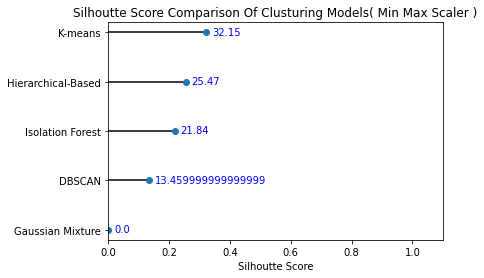


----------Davies Bouldin Score Using Min Max Scaler----------



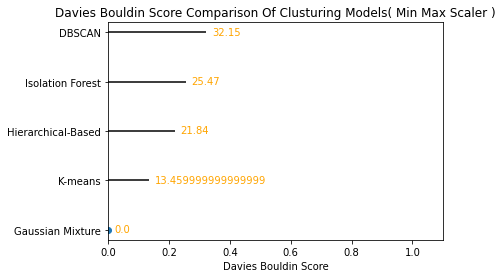


----------Comparision Chart Using Min Max Scaler----------



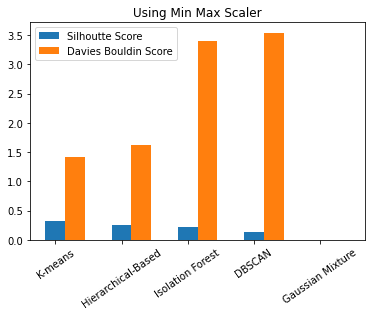

In [155]:
Evaluate(pca,df_MinMaxScaler,False,True)

***Evaluation Using - RobustScaler(PCA)***


********************Evaluation Using PCA********************


----------Evaluation Using Robust Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.418897,1.081178
Hierarchical-Based,0.199814,1.513581
Isolation Forest,0.643437,1.939496
DBSCAN,0.039345,2.668945
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Robust Scaler----------



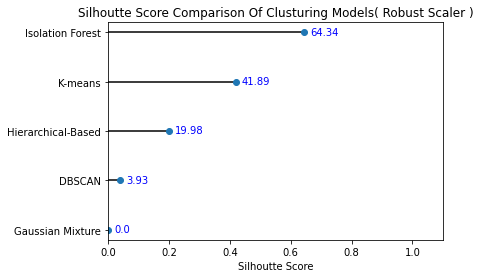


----------Davies Bouldin Score Using Robust Scaler----------



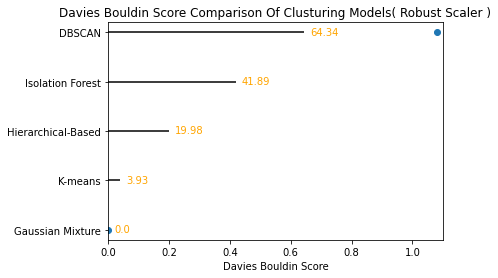


----------Comparision Chart Using Robust Scaler----------



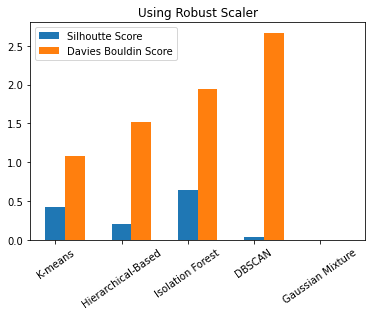

In [156]:
Evaluate(pca,df_RobustScaler,True)

***Evaluation Using - StandartScaler(PCA)***


********************Evaluation Using PCA********************


----------Evaluation Using Standard Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.197607,1.575151
Hierarchical-Based,0.154709,1.776164
Isolation Forest,0.510358,2.275244
DBSCAN,0.099729,3.002743
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Standard Scaler----------



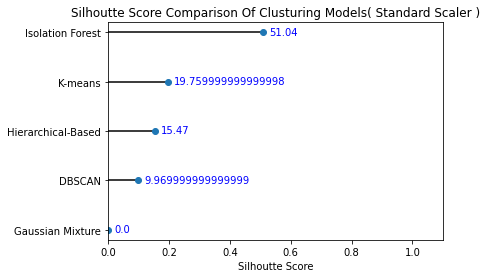


----------Davies Bouldin Score Using Standard Scaler----------



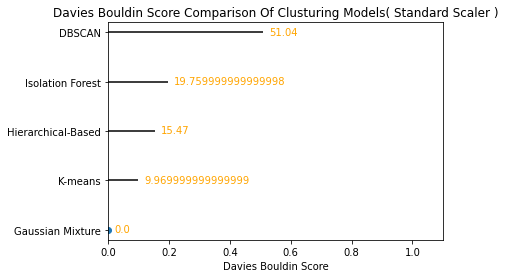


----------Comparision Chart Using Standard Scaler----------



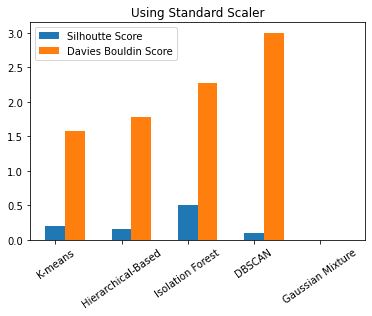

In [157]:
Evaluate(pca,df_Standard_Scaler,False)

# **Evaluation Using kernel PCA**

***Evaluation Using - MinMaxScaler(kernel PCA)***


********************Evaluation Using PCA Kernel********************


----------Evaluation Using Min Max Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.528551,0.761285
Hierarchical-Based,0.457793,0.870742
Isolation Forest,0.243536,1.797573
DBSCAN,0.136345,2.867116
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Min Max Scaler----------



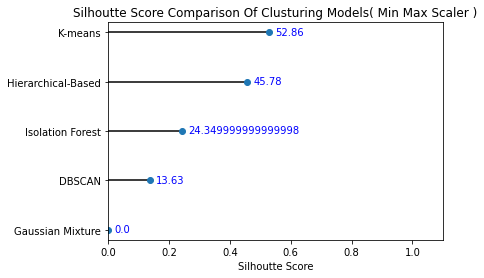


----------Davies Bouldin Score Using Min Max Scaler----------



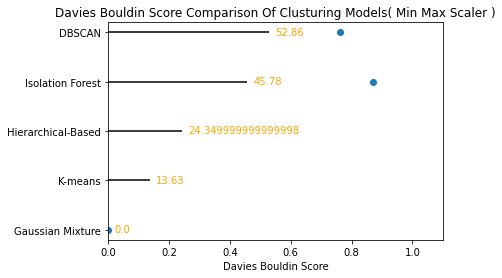


----------Comparision Chart Using Min Max Scaler----------



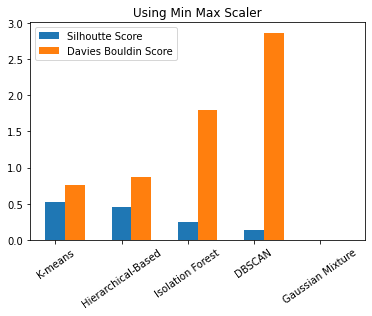

In [158]:
Evaluate(kernel_pca,df_MinMaxScaler,False,True)

***Evaluation Using - RobustScaler(kernel PCA)***


********************Evaluation Using PCA Kernel********************


----------Evaluation Using Robust Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.649436,0.640753
Hierarchical-Based,0.601160,0.674174
Isolation Forest,0.667339,1.260413
DBSCAN,0.390634,1.330051
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Robust Scaler----------



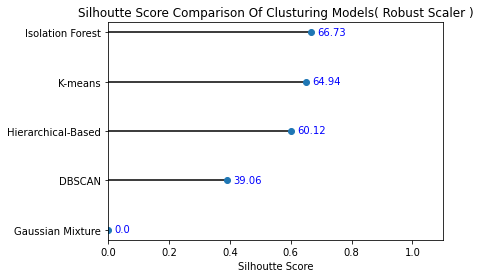


----------Davies Bouldin Score Using Robust Scaler----------



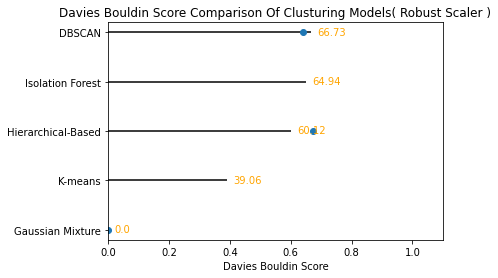


----------Comparision Chart Using Robust Scaler----------



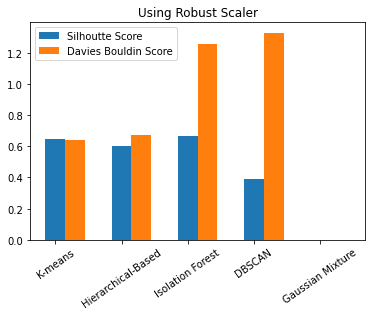

In [159]:
Evaluate(kernel_pca,df_RobustScaler,True)

***Evaluation Using - StandartScaler(kernel PCA)***


********************Evaluation Using PCA Kernel********************


----------Evaluation Using Standard Scaler----------



,Silhoutte Score,Davies Bouldin Score
K-means,0.407668,0.800665
Hierarchical-Based,0.360733,0.867089
Isolation Forest,0.495659,1.583186
DBSCAN,0.337785,1.111528
Gaussian Mixture,0.000000,0.000000



---------- Silhoutte Score Using Standard Scaler----------



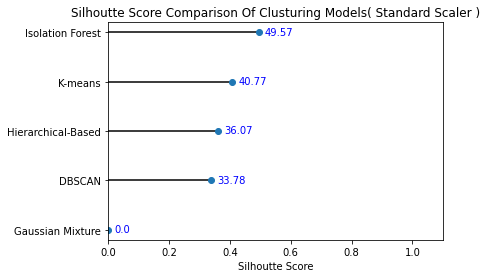


----------Davies Bouldin Score Using Standard Scaler----------



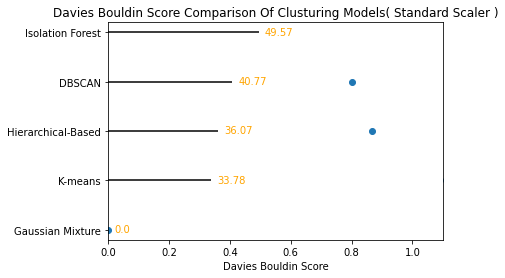


----------Comparision Chart Using Standard Scaler----------



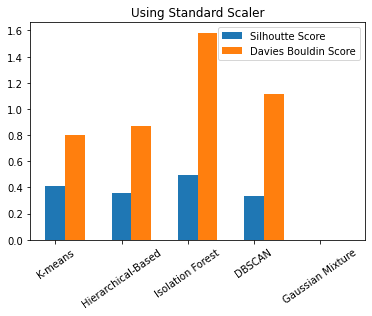

In [160]:
Evaluate(kernel_pca,df_Standard_Scaler,False)

# Conclusion : 
These result shows that the ***kernel pca*** is better as it enables dealing with more complex data patterns, which would not be visible under linear transformations alone.

These result shows also that the ***RobustScaler*** is better for this data

1. The ***Silhouette*** score used to study the separation distance between the resulting clusters :***kmean with kernel_pca and*** ***RobustScaler shows best score ***( **`higher values indicating better clustering`**)

2. the ***Davies-Bouldin*** score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score and ***Hierarchical Clustering with kernel_pca and RobustScaler shows best score *** then the K_mens .( **`lower values indicating better clustering`**)